In [2]:
pip install tensorflow numpy opencv-python


In [1]:
!pip install unrar

In [3]:
!unrar x ruedas.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from ruedas.rar

Creating    ruedas                                                    OK
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_434_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_435_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_436_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_437_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_438_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_439_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_440_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_441_0.jpg                    0%  OK 
Extracting  ruedas/Prueba 1.MOV_rueda_1_frame_442_0.jpg                    0% 

In [4]:
# Importar las librerías necesarias
import pandas as pd
import os
import cv2 # Importar la librería cv2
import numpy as np

pairs = []
pair_labels = []
size = (32, 32)

# Definir una función para crear los pares de imágenes y las etiquetas
def create_pairs():
    global pairs, pair_labels
    wheel_folder = "ruedas"
    images = [img for img in os.listdir(wheel_folder) if img.endswith('.jpg')]
    images.sort(key=lambda x: (x.split("_")[0], x.split("_")[2], int(x.split("_")[4]), int(x.split("_")[5].split(".")[0])))
    # Iterar sobre cada imagen
    for i in range(len(images) - 1):
        # Obtener el nombre de la imagen actual y la siguiente
        image_1 = images[i]
        image_2 = images[i + 1]
        # Obtener el número de frame de cada imagen
        frame_1 = int(image_1.split("_")[4])
        frame_2 = int(image_2.split("_")[4])
        # Obtener el estado de rodadura de cada imagen
        rodada_1 = int(image_1.split("_")[5].split(".")[0])
        rodada_2 = int(image_2.split("_")[5].split(".")[0])
        # Obtener el video y la rueda de cada imagen
        video_1 = image_1.split("_")[0]
        video_2 = image_2.split("_")[0]
        wheel_1 = image_1.split("_")[2]
        wheel_2 = image_2.split("_")[2]
        # Crear pares si las imágenes son del mismo video y la misma rueda
        if video_1 == video_2 and wheel_1 == wheel_2 and frame_2 == frame_1 + 1:
            pair = [os.path.join(wheel_folder, image_1), os.path.join(wheel_folder, image_2)]
            # Añadir el par a la lista de pares
            pairs.append(pair)
            # Determinar la etiqueta
            if rodada_1 == rodada_2:
                if rodada_1 == 0:
                    label = 0  # misma rueda, no rodada
                else:
                    label = 1  # misma rueda, sí rodada
            else:
                label = 1  # misma rueda, diferente rodada
            # Añadir la etiqueta a la lista de etiquetas
            pair_labels.append(label)

    # Para la clase 2, ordenamos por video, frame, numero de rueda
    images.sort(key=lambda x: (x.split("_")[0], int(x.split("_")[4]), x.split("_")[2]))
    # Iterar sobre cada imagen
    for i in range(len(images) - 1):
        # Obtener el nombre de la imagen actual y la siguiente
        image_1 = images[i]
        image_2 = images[i + 1]
        # Obtener el número de frame de cada imagen
        frame_1 = int(image_1.split("_")[4])
        frame_2 = int(image_2.split("_")[4])
        # Obtener el video y la rueda de cada imagen
        video_1 = image_1.split("_")[0]
        video_2 = image_2.split("_")[0]
        wheel_1 = image_1.split("_")[2]
        wheel_2 = image_2.split("_")[2]
        # Crear pares si las imágenes son del mismo video, mismo frame pero diferente rueda
        if video_1 == video_2 and frame_1 == frame_2 and wheel_1 != wheel_2:
            pair = [os.path.join(wheel_folder, image_1), os.path.join(wheel_folder, image_2)]
            # Añadir el par a la lista de pares
            pairs.append(pair)
            label = 2  # diferente rueda, mismo frame
            # Añadir la etiqueta a la lista de etiquetas
            pair_labels.append(label)

# Llamar a la función para crear los pares y las etiquetas
create_pairs()

# Convertir las listas de pares y etiquetas en arrays de NumPy
pairs = np.array(pairs)
pair_labels = np.array(pair_labels)

# Contar cuántos pares hay en cada clase antes de balancear
unique, counts = np.unique(pair_labels, return_counts=True)
print("Antes de balancear:")
print("Clases: ", unique)
print("Cantidad: ", counts)

# Encontrar el número mínimo de pares en las clases
min_clase = np.min(counts)

pares_balanceados = []
etiquetas_balanceadas = []

# Iterar sobre cada clase
for clase in unique:
    # Seleccionar aleatoriamente min_clase pares y etiquetas de esa clase
    indices = np.random.choice(np.where(pair_labels == clase)[0], min_clase, replace=False)
    # Añadir los pares y las etiquetas seleccionados a las listas balanceadas
    pares_balanceados.extend(pairs[indices])
    etiquetas_balanceadas.extend(pair_labels[indices])

# Convertir las listas en arrays de NumPy
pares_balanceados = np.array(pares_balanceados)
etiquetas_balanceadas = np.array(etiquetas_balanceadas)

# Contar cuántos pares hay en cada clase después de balancear
unique, counts = np.unique(etiquetas_balanceadas, return_counts=True)
print("Después de balancear:")
print("Clases: ", unique)
print("Cantidad: ", counts)

Antes de balancear:
Clases:  [0 1 2]
Cantidad:  [ 166 1643  861]
Después de balancear:
Clases:  [0 1 2]
Cantidad:  [166 166 166]


In [ ]:
# Crear una función para mostrar los nombres de los archivos de los pares de la clase 2
def show_class_2_filenames(pairs, labels):
    # Obtener los índices de los pares de la clase 2
    class_2_indices = [i for i, label in enumerate(labels) if label == 2]
    # Iterar sobre cada índice
    for index in class_2_indices:
        # Obtener el par de imágenes correspondiente
        pair = pairs[index]
        # Mostrar los nombres de los archivos
        print("Par de imágenes de la clase 2:")
        print("Imagen 1: ", pair[0])
        print("Imagen 2: ", pair[1])
        print()

# Llamar a la función para mostrar los nombres de los archivos de los pares de la clase 2
show_class_2_filenames(pares_balanceados, etiquetas_balanceadas)


In [ ]:
# Mostrar los pares y sus etiquetas balanceados
print(pares_balanceados)
print(etiquetas_balanceadas)
# Contar cuántos pares hay en cada clase
unique, counts = np.unique(etiquetas_balanceadas, return_counts=True)
print(unique, counts)

In [ ]:
# Mostrar el tipo de la lista
print(type(etiquetas_balanceadas))


<class 'numpy.ndarray'>


In [11]:
etiquetas_balanceadas[497]

2

In [12]:
# Mostrar la longitud de la lista
print(len(pares_balanceados))

498


In [ ]:
# Mostrar los primeros 10 elementos de la lista
print(pares_balanceados[:10])
print(etiquetas_balanceadas[:10])

[['ruedas/Prueba 1.MOV_rueda_1_frame_443_0.jpg'
  'ruedas/Prueba 1.MOV_rueda_1_frame_444_0.jpg']
 ['ruedas/Prueba 1.MOV_rueda_2_frame_442_0.jpg'
  'ruedas/Prueba 1.MOV_rueda_2_frame_443_0.jpg']
 ['ruedas/Prueba 12.MOV_rueda_4_frame_137_0.jpg'
  'ruedas/Prueba 12.MOV_rueda_4_frame_138_0.jpg']
 ['ruedas/Prueba 12.MOV_rueda_4_frame_155_0.jpg'
  'ruedas/Prueba 12.MOV_rueda_4_frame_156_0.jpg']
 ['ruedas/Prueba 1.MOV_rueda_1_frame_494_1.jpg'
  'ruedas/Prueba 1.MOV_rueda_1_frame_495_1.jpg']
 ['ruedas/Prueba 12.MOV_rueda_4_frame_286_1.jpg'
  'ruedas/Prueba 12.MOV_rueda_4_frame_287_1.jpg']
 ['ruedas/Prueba 1.MOV_rueda_2_frame_534_1.jpg'
  'ruedas/Prueba 1.MOV_rueda_2_frame_535_1.jpg']
 ['ruedas/Prueba 1.MOV_rueda_1_frame_456_1.jpg'
  'ruedas/Prueba 1.MOV_rueda_1_frame_457_1.jpg']
 ['ruedas/Prueba 12.MOV_rueda_7_frame_152_0.jpg'
  'ruedas/Prueba 12.MOV_rueda_7_frame_153_1.jpg']
 ['ruedas/Prueba 12.MOV_rueda_4_frame_163_0.jpg'
  'ruedas/Prueba 12.MOV_rueda_4_frame_164_1.jpg']]
[0 0 0 0 1 1 1 1 2 

In [ ]:
print(pares_balanceados[11], etiquetas_balanceadas[11])

['ruedas/Prueba 2.MOV_rueda_5_frame_167_0.jpg'
 'ruedas/Prueba 2.MOV_rueda_5_frame_168_0.jpg'] 0


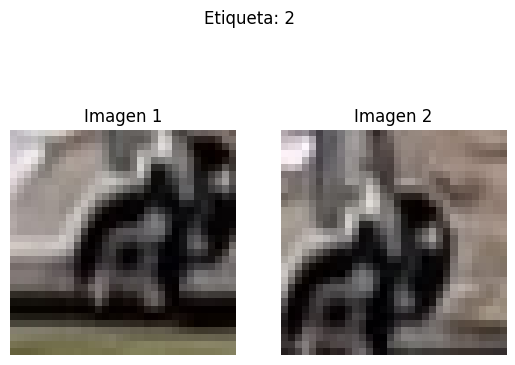

In [15]:
import matplotlib.pyplot as plt
# Obtener las rutas de las imágenes y la etiqueta correspondiente
ruta_imagenes = pares_balanceados[400]
etiqueta = etiquetas_balanceadas[400]

# Leer las imágenes
imagen1 = cv2.imread(ruta_imagenes[0])
imagen2 = cv2.imread(ruta_imagenes[1])

# Convertir las imágenes de BGR a RGB (OpenCV lee las imágenes en formato BGR)
imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)

# Crear una figura de Matplotlib y mostrar las imágenes
fig, axs = plt.subplots(1, 2)
fig.suptitle(f'Etiqueta: {etiqueta}')
axs[0].imshow(imagen1_rgb)
axs[0].axis('off')
axs[0].set_title('Imagen 1')
axs[1].imshow(imagen2_rgb)
axs[1].axis('off')
axs[1].set_title('Imagen 2')
plt.show()

In [20]:
# Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Lambda, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2 # Importar la librería cv2
from sklearn.model_selection import train_test_split

# Definir la función de distancia euclidiana
def euclidean_distance(vectors):
  # Desempaquetar los vectores
  x, y = vectors
  # Calcular la suma de las diferencias al cuadrado
  sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
  # Aplicar la raíz cuadrada y devolver el resultado
  return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

# Definir la entrada de la red siamesa
input_shape = (32, 32, 3) # Usar el mismo tamaño que las imágenes
left_input = Input(input_shape) # Entrada izquierda
right_input = Input(input_shape) # Entrada derecha

# Definir la subred base
base_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation="tanh", input_shape=input_shape), # Primera capa convolucional
  tf.keras.layers.AveragePooling2D((2, 2)), # Primera capa de agrupación promedio
  tf.keras.layers.Dropout(0.3), # Dropout
  tf.keras.layers.Conv2D(16, (5, 5), activation="tanh"), # Segunda capa convolucional
  tf.keras.layers.AveragePooling2D((2, 2)), # Segunda capa de agrupación promedio
  tf.keras.layers.Dropout(0.3), # Dropout
  tf.keras.layers.Flatten(), # Capa para aplanar las características
  tf.keras.layers.Dense(120, activation="tanh"), # Primera capa densa
  tf.keras.layers.Dense(84, activation="tanh") # Segunda capa densa
]) # Crear LeNet-5 como subred base
# Extraer las características de cada entrada usando la subred base
left_features = base_model(left_input)
right_features = base_model(right_input)

# Calcular la distancia entre las características usando una capa Lambda
distance = Lambda(euclidean_distance)([left_features, right_features])

# Aplicar una capa densa con activación softmax para obtener la probabilidad de cada clase
output = Dense(3, activation="softmax")(distance)

# Crear el modelo de la red siamesa
model = Model(inputs=[left_input, right_input], outputs=output)

# Compilar el modelo con un optimizador, una función de pérdida y una métrica
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Mostrar el resumen del modelo
model.summary()

# Definir una función para cargar y redimensionar las imágenes
def load_and_resize_images(pairs):
  # Crear una lista vacía para almacenar las imágenes
  images = []
  # Iterar sobre cada par
  for pair in pairs:
    # Leer la imagen usando cv2.imread
    img = cv2.imread(pair)
    # Redimensionar la imagen a 32x32 usando cv2.resize
    img = cv2.resize(img, (32, 32))
    # Añadir la imagen a la lista
    images.append(img)
  # Convertir la lista en un array de NumPy
  images = np.array(images)
  # Devolver el array de imágenes
  return images

# Obtener el array de imágenes izquierdas usando la primera columna de pares
left_images = load_and_resize_images(pares_balanceados[:, 0])
# Obtener el array de imágenes derechas usando la segunda columna de pares
right_images = load_and_resize_images(pares_balanceados[:, 1])

# Dividir los datos en conjuntos de entrenamiento y validación
left_images_train, left_images_val, right_images_train, right_images_val, etiquetas_train, etiquetas_val = train_test_split(left_images, right_images, etiquetas_balanceadas, test_size=0.2, random_state=42)

# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Definir el callback de ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Entrenar el modelo con los arrays de imágenes y las etiquetas
history = model.fit([left_images_train, right_images_train], etiquetas_train, validation_data=([left_images_val, right_images_val], etiquetas_val), epochs=200, batch_size=8, callbacks=[early_stopping, model_checkpoint])


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 84)                   61156     ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 lambda_4 (Lambda)           (None, 1)                    0         ['sequential_4[0][0]',  

In [21]:
model.save_weights("weights.h5")

Etiqueta: 0
1/1 [==============================] - 0s 28ms/step
[[9.5563132e-01 4.4064727e-02 3.0396754e-04]]


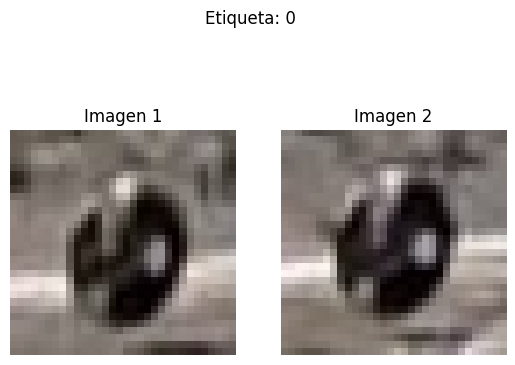

In [28]:
# Obtener las rutas de las imágenes y la etiqueta correspondiente
ruta_imagenes = pares_balanceados[75]
etiqueta = etiquetas_balanceadas[75]

print ((f'Etiqueta: {etiqueta}'))
# Leer las imágenes
imagen1 = cv2.imread(ruta_imagenes[0])
imagen2 = cv2.imread(ruta_imagenes[1])

# Redimensionar las imágenes a 32 x 32
img1 = cv2.resize(imagen1, (32, 32))
img2 = cv2.resize(imagen2, (32, 32))

# Añadir una dimensión extra al principio de la entrada
img1 = tf.expand_dims(img1, axis=0)
img2 = tf.expand_dims(img2, axis=0)

# Hacer la predicción
pred = model.predict([img1, img2])

# Mostrar la clase predicha
print(pred)


# Convertir las imágenes de BGR a RGB (OpenCV lee las imágenes en formato BGR)
imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)

# Crear una figura de Matplotlib y mostrar las imágenes
fig, axs = plt.subplots(1, 2)
fig.suptitle(f'Etiqueta: {etiqueta}')
axs[0].imshow(imagen1_rgb)
axs[0].axis('off')
axs[0].set_title('Imagen 1')
axs[1].imshow(imagen2_rgb)
axs[1].axis('off')
axs[1].set_title('Imagen 2')
plt.show()
